# Descriptive Analytics

This section contains the descriptive analytics used to explore the datasets related to the required insights aimed to be provided to the brand, their consumer and the operational device. <br> The descriptive analytics section covers the following:
- Description of Dataset
- The distribution of data
- The variance of attributes
- Visualisation of distribution and variance

#### Imports

In [1]:
# Library Imports
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean, median, mode, stdev
%matplotlib inline

In [2]:
import plotly as px

<br>

#### USER Defined Functions

In [3]:
def extract():
    # User prompt - Beginning process
    print("Starting Extraction...")\
    
    # Empty files list
    files_list = []
    
    #Obtain file names
    path = "../DATA"
        
    from os import listdir

    def find_csv_filenames( path_to_dir, suffix=".csv" ):
        filenames = listdir(path_to_dir)
        return [ filename for filename in filenames if filename.endswith( suffix ) ]

    filenames = find_csv_filenames(path)
    for name in filenames:
        files_list.append(name)
        
    x = sorted(files_list)
    # Empty dictionary to hold dfs
    global df
    
    # For each of the files in the array list, create a pd df
    for i in x:
        print("Creating df for: ", i)
        df = pd.read_csv("../DATA/{}".format(i), sep=",", header=0)
    
    # Confirmation of completion
    print("Complete! \n Access Pandas dataframe by calling df")
    return;

In [4]:
# Function provides details about a specified DF
def dataShape(dfName):
    print("Data Shape: \n", dfName.shape, "\n")
    print("Data Count: \n",dfName.count(), "\n")
    print("Data Info:")
    print(dfName.info(), "\n")
    print("Unique Values in Each Column: ")
    for col in dfName:
        print(col+": \n", dfName[col].unique(), "\n")

In [5]:
def nanValues(dfName):
    df = dfName
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data.index, y=missing_data['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return missing_data;

In [6]:
# The function is used to show the distribution of data for the categorical datatypes.
# The function is operated by specifying a DF and attribute name from the available datasets.
# This then produces a bar chart to display the distribution of data for the entered attribute.
def dist(dfName, colName):
    AR_count = dfName[colName].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(AR_count.index, AR_count.values, alpha=0.9)
    plt.title('Frequency Distribution of "{var_name}"'.format(var_name=colName))
    plt.xticks(rotation='45')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(colName, fontsize=12)
    plt.show()

In [7]:
# Function used to calculate the mean, median, mode and standard deviation of a given dataset attribute.
def mmm(dfName, colName):
    mean = dfName[colName].mean()
    median = dfName[colName].median()
    mode = dfName[colName].mode()
    stan = dfName[colName].std()
    print("3Ms for {}: \n".format(colName), "Mean: ", mean, "\n Median: ", median, "\n Mode: ", mode,"\n Standard Dev: ", stan, "\n")
    return;

In [8]:
# Function used to show variance of data for a single attribute.
def singleBoxplot(dfName, colName):
    sns.set(style="darkgrid")
    plt.figure(figsize=(10,8))
    ax = sns.boxplot(x=colName, data=dfName, orient="v")
    
# Function used to show variance of data for based on two attributes.
def boxplot(dfName, XcolName, YcolName):
    sns.set(style="darkgrid")
    plt.figure(figsize=(10,8))
    ax = sns.boxplot(x=XcolName, y=YcolName, data=dfName, orient="v")

In [9]:
def histo(dfName, colName):
    # Drop any null values
    filter_data = dfName.dropna(subset=[colName])
    plt.figure(figsize=(14,8))
    # Plot histogram with filtered data
    sns.distplot(filter_data[colName], kde=False)
    return;

## Extraction

In [10]:
extract()

Starting Extraction...
Creating df for:  2807.csv
Creating df for:  newTest.csv
Creating df for:  test.csv
Complete! 
 Access Pandas dataframe by calling df


### Analysis

In [11]:
dataShape(df)

Data Shape: 
 (94, 52) 

Data Count: 
 idTreatmentCartDetails    94
CutitronicsTreatmentID    94
TreatmentNumber           94
CutitronicsCartID         94
CutitronicsSKUID          94
CartLevel                 94
CartState                 94
CartDispensedAmount       94
CutitronicsParameterID    65
CartEnvTemperature        94
CartEnvHumidity           94
CartEnvPollution          94
CartEnvUv                 94
Tracked                   94
CutitronicsClientID       94
TreatmentStartDate        94
TreatmentType             94
CutitronicsCtrlID         94
CtrlBatteryLevel          94
CtrlTemperature           94
CtrlDatetime              94
CtrlState                 94
CtrlStatus                94
CtrlFirmwareVersion       94
CtrlLatitude              94
CtrlLongitude             94
CtrlSkinHealth            94
CtrlHumidity              94
CtrlaccData               94
MeasurementArea            0
Status                    94
clientLat                 94
clientLon                 94
Firs

CtrlLatitude: 
 [51.5       56.        55.7543389] 

CtrlLongitude: 
 [22.2       -3.2       -4.1646007] 

CtrlSkinHealth: 
 [ 50  53  60  70  72  78  80  76  85  88  95 150 145 140 153 155  99  91
  87  83  79  75  71  73  77  81  93 105 111 117 123 129 135   5   8  11
  14  17  20  23  26  28  30  32  38  44  56  62  68 120 124] 

CtrlHumidity: 
 [89 53 40 42 39] 

CtrlaccData: 
 [123   0] 

MeasurementArea: 
 [nan] 

Status: 
 ['Registered'] 

clientLat: 
 [38.88028] 

clientLon: 
 [-6.975278] 

FirstName: 
 ['Kevin' 'Joanna' 'Sammy' 'Joe'] 

Surname: 
 ['Kelly' 'Smith' 'Bloggs'] 

YOB: 
 [1990 1985 1956 1988] 

Gender: 
 ['M' 'F'] 

FITZP: 
 [4 3 5] 

SkinConcerns: 
 ['None' 'DRY'] 

Allergies: 
 ['None'] 

CutitronicsBrandID: 
 ['0c9fcdb8-5f93-11ea-846e-106530b25ee4'] 

CutitronicsSKUCat: 
 ['CART'] 

CutitronicsSKUType: 
 ['Cream' 'Lotion'] 

CutitronicsSKUName: 
 ['Marine Cream' 'Cleansing'] 

prescribedOn: 
 ['27/05/2020 13:56'] 

PrescriptionName: 
 ['Dry Skin'] 

Prescription

,Total,Percent
MeasurementArea,94,100.000000
CutitronicsParameterID,29,30.851064
installDate,0,0.000000
Tracked,0,0.000000
CtrlStatus,0,0.000000
CtrlState,0,0.000000
CtrlDatetime,0,0.000000
CtrlTemperature,0,0.000000
CtrlBatteryLevel,0,0.000000
CutitronicsCtrlID,0,0.000000


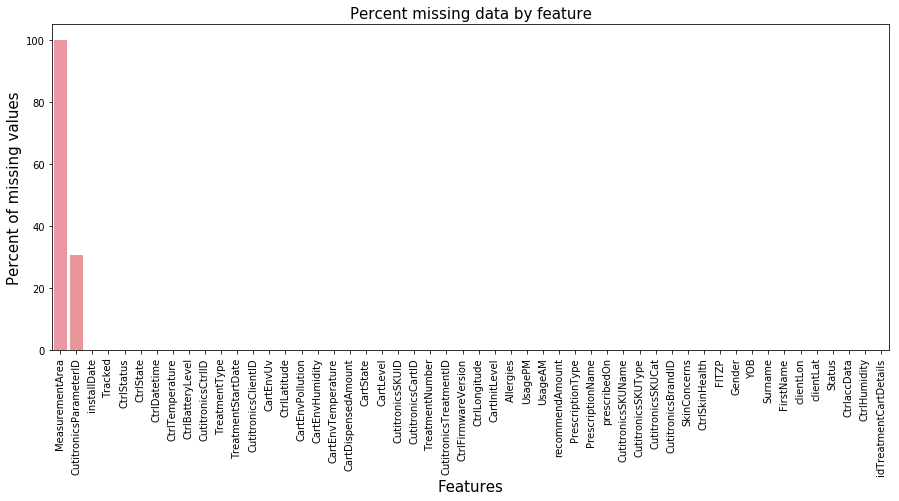

In [12]:
nanValues(df)

In [13]:
mmm(df, 'CartLevel')
mmm(df, 'CartDispensedAmount')
mmm(df, 'CartEnvTemperature')
mmm(df, 'CartEnvHumidity')
mmm(df, 'CartEnvPollution')
mmm(df, 'CartEnvUv')
mmm(df, 'CtrlTemperature')
mmm(df, 'CtrlBatteryLevel')
mmm(df, 'CtrlSkinHealth')
mmm(df, 'YOB')

3Ms for CartLevel: 
 Mean:  32.59574468085106 
 Median:  33.0 
 Mode:  0    10
1    16
2    22
3    28
4    34
5    40
6    46
7    52
8    58
9    62
dtype: int64 
 Standard Dev:  18.232264411436113 

3Ms for CartDispensedAmount: 
 Mean:  2.074468085106383 
 Median:  2.0 
 Mode:  0    1
dtype: int64 
 Standard Dev:  1.1191333215679014 

3Ms for CartEnvTemperature: 
 Mean:  66.96808510638297 
 Median:  68.0 
 Mode:  0    73
dtype: int64 
 Standard Dev:  10.46802825982969 

3Ms for CartEnvHumidity: 
 Mean:  67.91489361702128 
 Median:  67.5 
 Mode:  0    84
dtype: int64 
 Standard Dev:  10.216642099780758 

3Ms for CartEnvPollution: 
 Mean:  69.87234042553192 
 Median:  72.0 
 Mode:  0    66
1    72
2    84
dtype: int64 
 Standard Dev:  10.317783002002546 

3Ms for CartEnvUv: 
 Mean:  69.09574468085107 
 Median:  67.0 
 Mode:  0    57
dtype: int64 
 Standard Dev:  10.736400899658936 

3Ms for CtrlTemperature: 
 Mean:  18.01063829787234 
 Median:  17.0 
 Mode:  0    16
dtype: int64 
 Sta

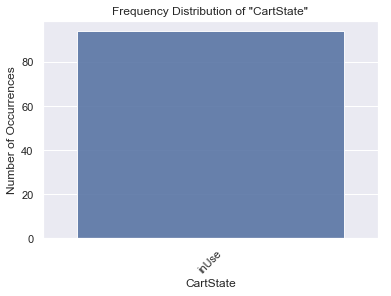

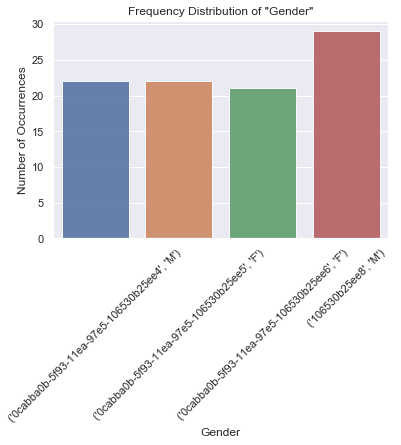

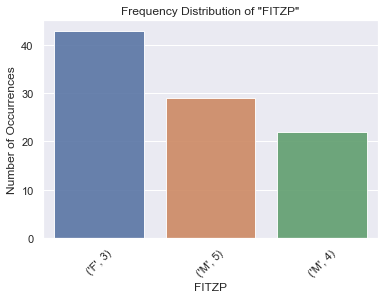

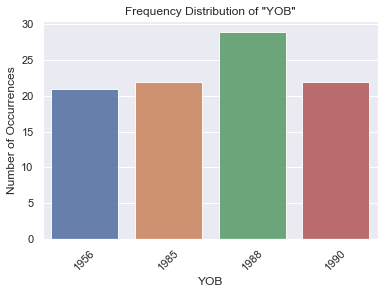

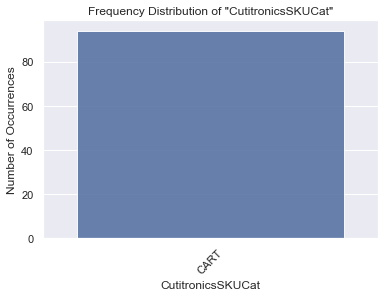

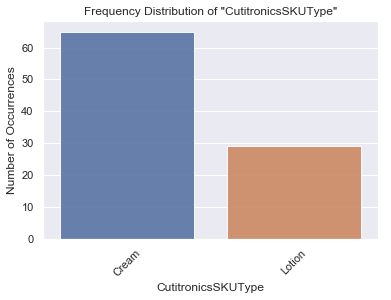

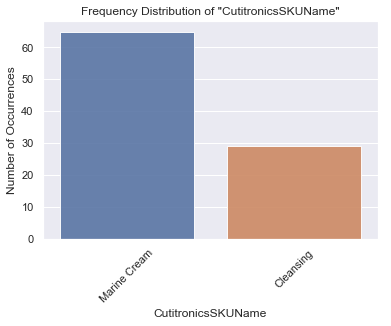

In [14]:
dist(df, 'CartState')
dist(df.groupby(['CutitronicsClientID']), 'Gender')
dist(df.groupby(['Gender']), 'FITZP')
dist(df, 'YOB')
dist(df, 'CutitronicsSKUCat')
dist(df, 'CutitronicsSKUType')
dist(df, 'CutitronicsSKUName')

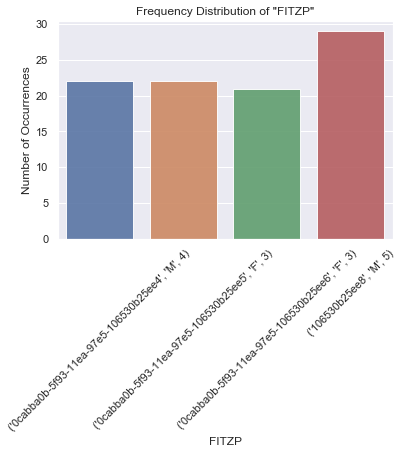

In [15]:
dist(df.groupby(['CutitronicsClientID', 'Gender']), 'FITZP')

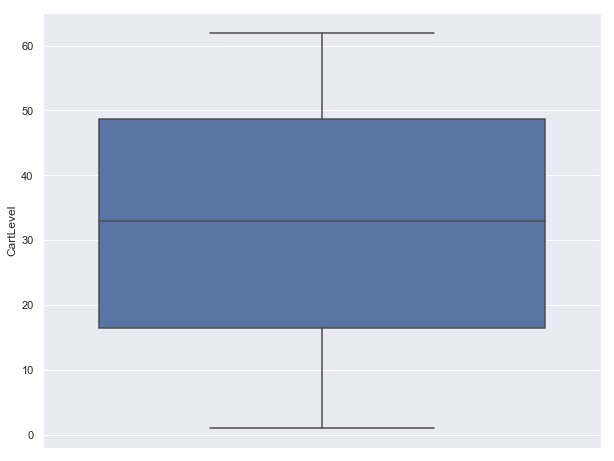

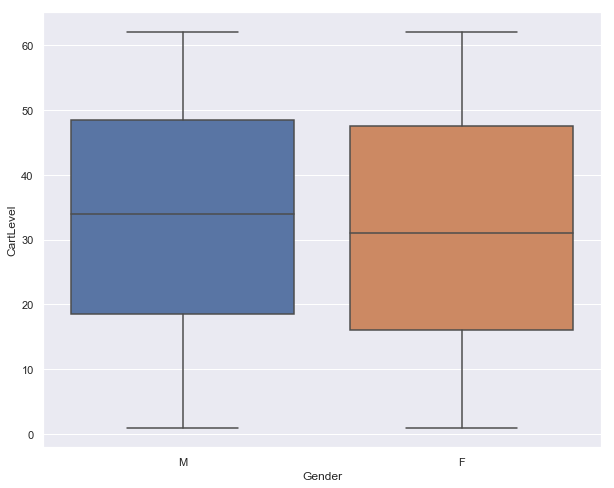

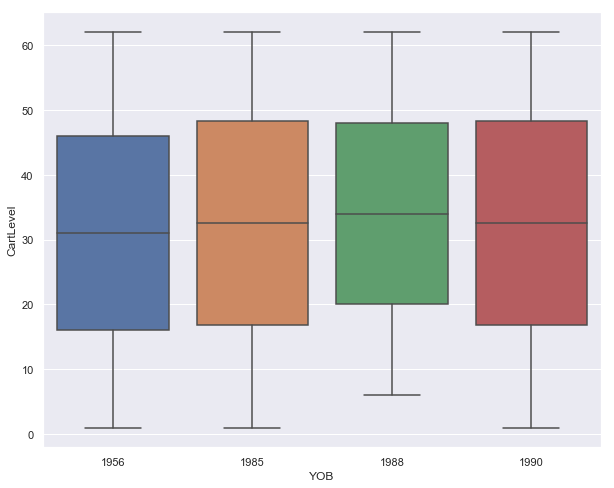

In [16]:
singleBoxplot(df, 'CartLevel')
boxplot(df, 'Gender', 'CartLevel'  )
boxplot(df, 'YOB', 'CartLevel'  )

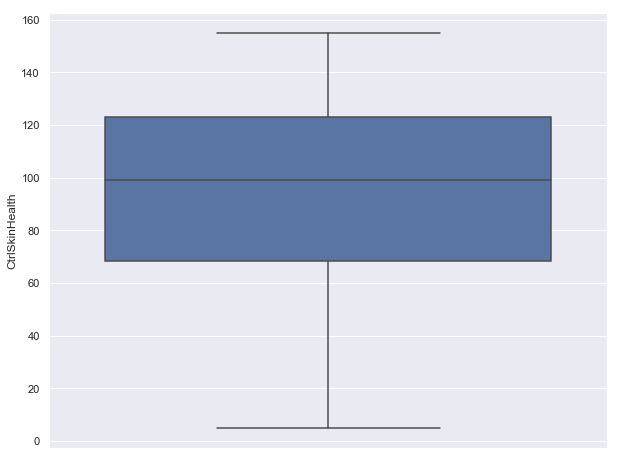

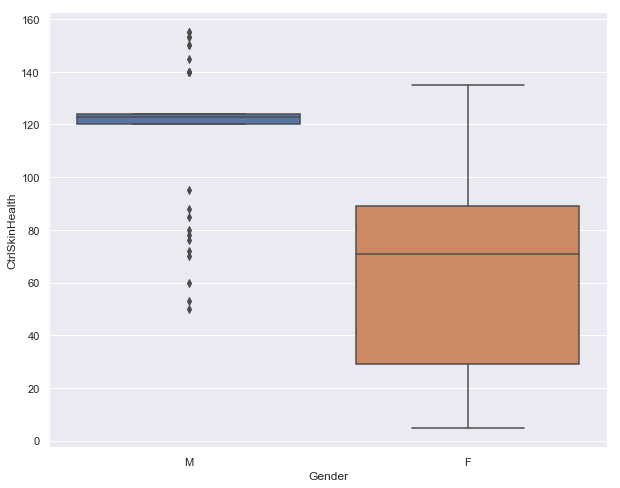

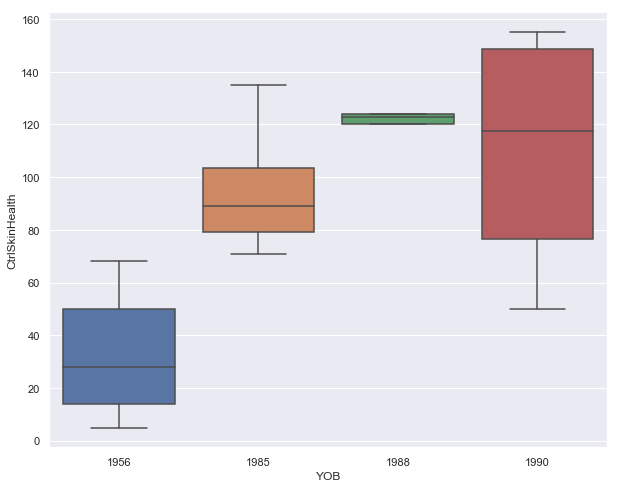

In [17]:
singleBoxplot(df, 'CtrlSkinHealth')
boxplot(df, 'Gender', 'CtrlSkinHealth'  )
boxplot(df, 'YOB', 'CtrlSkinHealth'  )

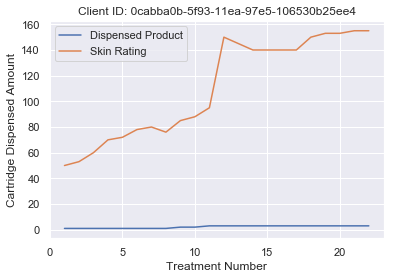

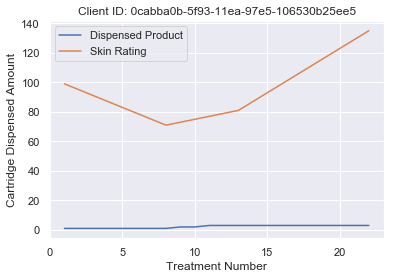

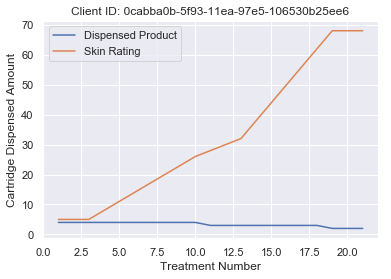

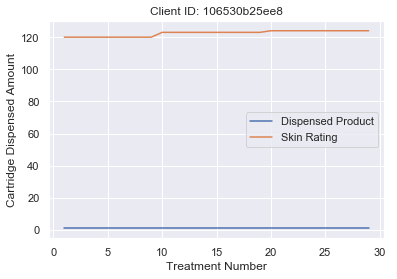

In [18]:
for ID, data in df.groupby(['CutitronicsClientID']):
    plt.plot(data['TreatmentNumber'], data['CartDispensedAmount'], label='Dispensed Product')
    plt.plot(data['TreatmentNumber'], data['CtrlSkinHealth'], label='Skin Rating')
    plt.xlabel('Treatment Number')
    plt.ylabel('Cartridge Dispensed Amount')
    plt.title('Client ID: ' + ID)
    plt.legend()
    plt.show()

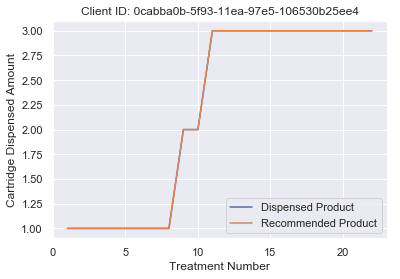

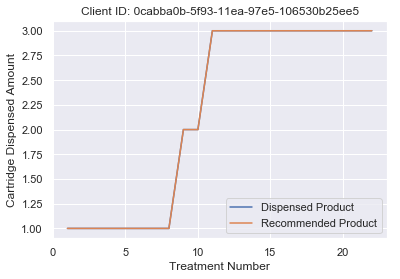

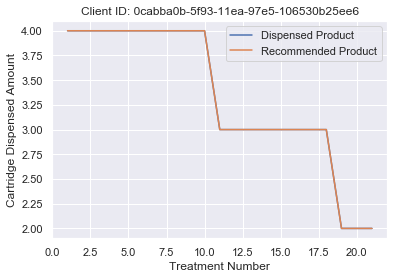

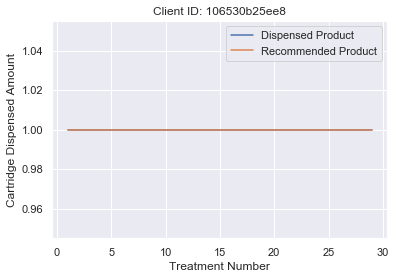

In [19]:
for ID, data in df.groupby(['CutitronicsClientID']):
    plt.plot(data['TreatmentNumber'], data['CartDispensedAmount'], label='Dispensed Product')
    plt.plot(data['TreatmentNumber'], data['recommendAmount'], label='Recommended Product')
    plt.xlabel('Treatment Number')
    plt.ylabel('Cartridge Dispensed Amount')
    plt.title('Client ID: ' + ID)
    plt.legend()
    plt.show()

In [20]:
# YOB to AGE
now = pd.Timestamp('now')
df['YOB'] = pd.to_datetime(df['YOB'], format='%m%d%y')    # 1 - Convert the YOB to timestamp
df['YOB'] = df['YOB'].where(df['YOB'] < now, df['YOB'] -  np.timedelta64(100, 'Y'))   # 2 
df['age'] = (now - df['YOB']).astype('<m8[Y]')    # 3

# AGE to AGERANGE
bins = [18, 29, 39, 49, 59, 69, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['agerange'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)

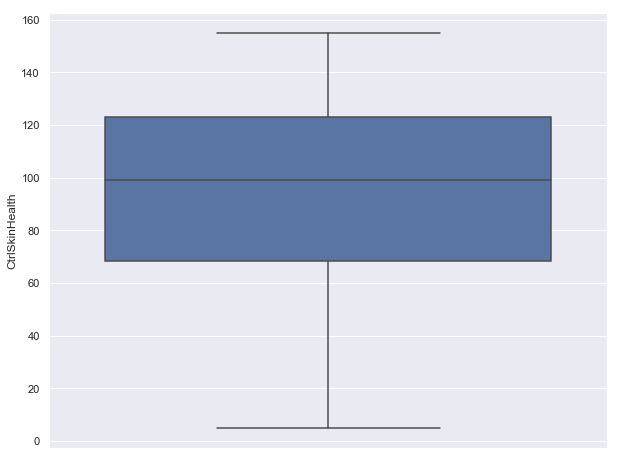

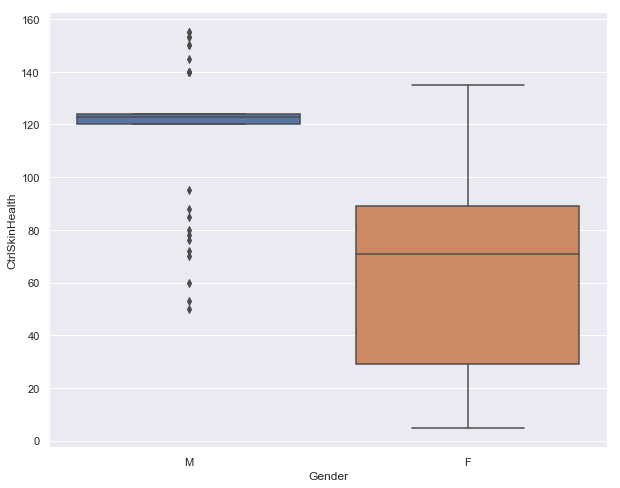

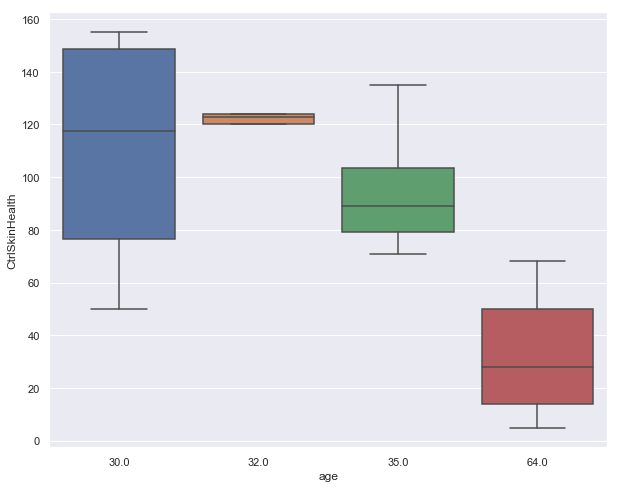

In [21]:
singleBoxplot(df, 'CtrlSkinHealth')
boxplot(df, 'Gender', 'CtrlSkinHealth'  )
boxplot(df, 'age', 'CtrlSkinHealth'  )

In [22]:
bins = [18, 29, 39, 49, 59, 69, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['agerange'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)

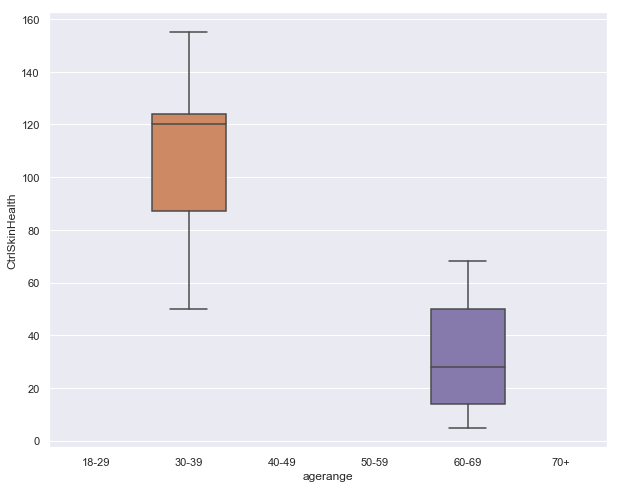

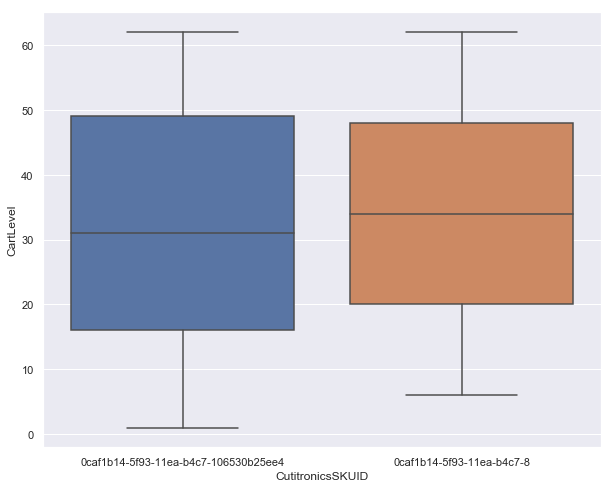

In [23]:
boxplot(df, 'agerange', 'CtrlSkinHealth'  )
boxplot(df, 'CutitronicsSKUID', 'CartLevel'  )

## Pre pre-processing

In [24]:
import datetime as dt
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import tqdm
from tqdm._tqdm_notebook import tqdm_notebook
from tqdm.auto import tqdm

/Users/andrewfarrell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  import sys


In [25]:
tqdm.pandas()
df['geom'] = df['clientLat'].map(str) + ',' + df['clientLon'].map(str)
locator = Nominatim(user_agent='myGeocoder', timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)
df['location'] = df['geom'].progress_apply(rgeocode)

/Users/andrewfarrell/anaconda3/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [26]:
df.head()

,idTreatmentCartDetails,CutitronicsTreatmentID,TreatmentNumber,CutitronicsCartID,CutitronicsSKUID,CartLevel,CartState,CartDispensedAmount,CutitronicsParameterID,CartEnvTemperature,...,PrescriptionType,recommendAmount,UsageAM,UsagePM,CartInitLevel,installDate,age,agerange,geom,location
0,763,51863b92-9b28-422f-9afb-3ef40a64e837,1,0cb26a14-5f93-11ea-894b-106530b25ee4,0caf1b14-5f93-11ea-b4c7-106530b25ee4,62,inUse,1,e6ee4e8f-1f03-426e-aa12-5e96f9a43e86,72,...,Daily,1,1,0,63,01/06/2020,30.0,30-39,"38.88028,-6.975278","(5, Plaza de los Reyes Católicos, Santo Doming..."
1,763,51863b92-9b28-422f-9afb-3ef40a64e837,2,0cb26a14-5f93-11ea-894b-106530b25ee4,0caf1b14-5f93-11ea-b4c7-106530b25ee4,61,inUse,1,e6ee4e8f-1f03-426e-aa12-5e96f9a43e86,62,...,Daily,1,1,0,63,01/06/2020,30.0,30-39,"38.88028,-6.975278","(5, Plaza de los Reyes Católicos, Santo Doming..."
2,842,533c402e-9d71-47e3-95ad-45f03c004747,3,0cb26a14-5f93-11ea-894b-106530b25ee4,0caf1b14-5f93-11ea-b4c7-106530b25ee4,58,inUse,1,9e526c7b-8de8-4f02-a766-aa265ae8063c,83,...,Daily,1,1,0,63,01/06/2020,30.0,30-39,"38.88028,-6.975278","(5, Plaza de los Reyes Católicos, Santo Doming..."
3,842,533c402e-9d71-47e3-95ad-45f03c004747,4,0cb26a14-5f93-11ea-894b-106530b25ee4,0caf1b14-5f93-11ea-b4c7-106530b25ee4,55,inUse,1,9e526c7b-8de8-4f02-a766-aa265ae8063c,74,...,Daily,1,1,0,63,01/06/2020,30.0,30-39,"38.88028,-6.975278","(5, Plaza de los Reyes Católicos, Santo Doming..."
4,843,72e6ed4d-86b7-40fd-944a-e861abfe30e3,5,0cb26a14-5f93-11ea-894b-106530b25ee4,0caf1b14-5f93-11ea-b4c7-106530b25ee4,52,inUse,1,6c80f65c-e396-41e6-a8ee-b2e8b761e51a,73,...,Daily,1,1,0,63,01/06/2020,30.0,30-39,"38.88028,-6.975278","(5, Plaza de los Reyes Católicos, Santo Doming..."


In [31]:
# Convert Date attributes from type object to datetime object.
df['TreatmentStartDate'] = pd.to_datetime(df['TreatmentStartDate'], format='%d/%m/%Y %H:%M')
df['CtrlDatetime'] = pd.to_datetime(df['CtrlDatetime'], format='%d/%m/%Y %H:%M')
df['installDate'] = pd.to_datetime(df['installDate'], format='%d/%m/%Y')

# Set new attributes of Time and Date of Treatment
df['treatmentDate'] = df['TreatmentStartDate'].dt.date
# df['treatmentDate'] = pd.to_datetime(df['treatmentDate'])

df['treatmentTime'] = df['TreatmentStartDate'].dt.time
# df['treatmentTime'] = pd.to_datetime(df['treatmentTime'])

In [32]:
df.to_csv(r'./1407.csv', index = False)
# df.describe()
df['installDate'].head()

0   2020-06-01
1   2020-06-01
2   2020-06-01
3   2020-06-01
4   2020-06-01
Name: installDate, dtype: datetime64[ns]

### <br> One Hot Encoding

In [27]:
df1 = df[['agerange', 'CutitronicsSKUName']]

In [28]:
pd.get_dummies(df1, prefix=['agerange', 'CutitronicsSKUName'])

,agerange_18-29,agerange_30-39,agerange_40-49,agerange_50-59,agerange_60-69,agerange_70+,CutitronicsSKUName_Cleansing,CutitronicsSKUName_Marine Cream
0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
89,0,1,0,0,0,0,1,0
90,0,1,0,0,0,0,1,0
91,0,1,0,0,0,0,1,0
92,0,1,0,0,0,0,1,0


In [29]:
a = df.select_dtypes(include=['object'])
b = []
for col in a:
        b.append(col)
print(b)

['CutitronicsTreatmentID', 'CutitronicsCartID', 'CutitronicsSKUID', 'CartState', 'CutitronicsParameterID', 'CutitronicsClientID', 'TreatmentType', 'CutitronicsCtrlID', 'CtrlState', 'CtrlFirmwareVersion', 'Status', 'FirstName', 'Surname', 'Gender', 'SkinConcerns', 'Allergies', 'CutitronicsBrandID', 'CutitronicsSKUCat', 'CutitronicsSKUType', 'CutitronicsSKUName', 'prescribedOn', 'PrescriptionName', 'PrescriptionType', 'installDate', 'geom', 'location', 'treatmentTime']



## <br> Consumer Insight Requirements


In [34]:
dfr1 = df[['CutitronicsClientID', 'agerange', 'Gender', 'FITZP', 'SkinConcerns', 'Allergies', 'CutitronicsSKUType', 'CutitronicsSKUName', 'CutitronicsSKUCat', 'CutitronicsCartID']]

In [36]:
dfr2 = df[['CutitronicsClientID', 'CutitronicsCartID', 'TreatmentNumber', 'CartDispensedAmount', 'TreatmentStartDate', 'CutitronicsSKUType', 'CutitronicsSKUName', 'CutitronicsBrandID', 'PrescriptionType', 'prescribedOn', 'Frequency', 'UsageAM', 'UsagePM']]

In [38]:
dfr3 = df[['CutitronicsBrandID', 'agerange','Gender', 'CutitronicsSKUName', 'CutitronicsSKUType', 'FITZP']]

In [40]:
dfr4 = df[['CutitronicsClientID', 'CutitronicsCartID', 'TreatmentNumber', 'CartDispensedAmount', 'CutitronicsSKUName', 'CtrlSkinHealth']]

In [42]:
dfr6 = df[['CutitronicsClientID', 'CutitronicsBrandID', 'CutitronicsCartID', 'CutitronicsSKUName', 'CutitronicsSKUType', 'TreatmentStartDate']]

In [314]:
dfr7 = df[['CutitronicsClientID', 'CutitronicsBrandID', 'CutitronicsCartID', 'CutitronicsSKUName', 'CutitronicsSKUType', 'TreatmentStartDate', 'location']]